# Activity: Build a random forest model

## **Introduction**


As you're learning, random forests are popular statistical learning algorithms. Some of their primary benefits include reducing variance, bias, and the chance of overfitting.

This activity is a continuation of the project you began modeling with decision trees for an airline. Here, you will train, tune, and evaluate a random forest model using data from spreadsheet of survey responses from 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment. Your random forest model will be used to predict whether a customer will be satisfied with their flight experience.

**Note:** Because this lab uses a real dataset, this notebook first requires exploratory data analysis, data cleaning, and other manipulations to prepare it for modeling.

## **Step 1: Imports** 


Import relevant Python libraries and modules, including `numpy` and `pandas`libraries for data processing; the `pickle` package to save the model; and the `sklearn` library, containing:
- The module `ensemble`, which has the function `RandomForestClassifier`
- The module `model_selection`, which has the functions `train_test_split`, `PredefinedSplit`, and `GridSearchCV` 
- The module `metrics`, which has the functions `f1_score`, `precision_score`, `recall_score`, and `accuracy_score`


In [1]:
# import operational libraries
import pandas as pd
import numpy as np

#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# For Test Train Split
from sklearn.model_selection import train_test_split, PredefinedSplit

# For Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# For Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# For Saving Models
import pickle

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
air_data = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The `read_csv()` function from the `pandas` library can be helpful here.
 
</details>

Now, you're ready to begin cleaning your data. 

## **Step 2: Data cleaning** 

To get a sense of the data, display the first 10 rows.

In [3]:
# Display first 10 rows.
air_data.head(10)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The `head()` function from the `pandas` library can be helpful here.
 
</details>

Now, display the variable names and their data types. 

In [4]:
# Display variable names and types.
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

DataFrames have an attribute that outputs variable names and data types in one result.
 
</details>

**Question:** What do you observe about the differences in data types among the variables included in the data?

- There are three types `object`, `int64` and `float64`
- Majority of our data is numerical as `int64` and `float64`
- There are only 4 `object` type which are `satisfaction`, `Customer Type`, `Type of Travel` and `Class`

Next, to understand the size of the dataset, identify the number of rows and the number of columns.

In [5]:
# Identify the number of rows and the number of columns.
air_data.shape

(129880, 22)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

There is a method in the `pandas` library that outputs the number of rows and the number of columns in one result.

</details>

Now, check for missing values in the rows of the data. Start with .isna() to get Booleans indicating whether each value in the data is missing. Then, use .any(axis=1) to get Booleans indicating whether there are any missing values along the columns in each row. Finally, use .sum() to get the number of rows that contain missing values.

In [6]:
# Get Booleans to find missing values in data.
# Get Booleans to find missing values along columns.
# Get the number of rows that contain missing values.
air_data.isna().any(axis=1).sum()

np.int64(393)

**Question:** How many rows of data are missing values?**

- 393 rows have missing values

Drop the rows with missing values. This is an important step in data cleaning, as it makes the data more useful for analysis and regression. Then, save the resulting pandas DataFrame in a variable named `air_data_subset`.

In [7]:
# Drop missing values.
# Save the DataFrame in variable `air_data_subset`.
air_data_subset = air_data.dropna(axis = 0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `dropna()` function is helpful here.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The axis parameter passed in to this function should be set to 0 (if you want to drop rows containing missing values) or 1 (if you want to drop columns containing missing values).
</details>

Next, display the first 10 rows to examine the data subset.

In [8]:
# Display the first 10 rows.
air_data_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Confirm that it does not contain any missing values.

In [9]:
# Count of missing values.
air_data_subset.isna().any(axis = 0).sum()

np.int64(0)

In [10]:
air_data_subset.isna().any(axis = 0)

satisfaction                         False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment               False
Online support                       False
Ease of Online booking               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Online boarding                      False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
dtype: bool

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can use the `.isna().sum()` to get the number of missing values for each variable.

</details>

Next, convert the categorical features to indicator (one-hot encoded) features. 

**Note:** The `drop_first` argument can be kept as default (`False`) during one-hot encoding for random forest models, so it does not need to be specified. Also, the target variable, `satisfaction`, does not need to be encoded and will be extracted in a later step.

In [11]:
air_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             129487 no

In [12]:
print("Values in Customer Type: ", air_data_subset['Customer Type'].unique())
print("Values in Type of Travel: ", air_data_subset['Type of Travel'].unique())
print("Values in Class: ", air_data_subset['Class'].unique())

Values in Customer Type:  ['Loyal Customer' 'disloyal Customer']
Values in Type of Travel:  ['Personal Travel' 'Business travel']
Values in Class:  ['Eco' 'Business' 'Eco Plus']


In [13]:
# Convert categorical features to one-hot encoded features.
air_data_subset_dummies = pd.get_dummies(air_data_subset, drop_first = False,
                                 columns = ['Customer Type', 'Type of Travel', 'Class'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can use the `pd.get_dummies()` function to convert categorical variables to one-hot encoded variables.
</details>

**Question:** Why is it necessary to convert categorical data into dummy variables?**

- The model we will use is a Random Forest Classifier, where categorical variables needs to be in numerical.

Next, display the first 10 rows to review the `air_data_subset_dummies`. 

In [14]:
# Display the first 10 rows.
air_data_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Then, check the variables of air_data_subset_dummies.

In [15]:
# Display variables.
air_data_subset_dummies.dtypes

satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer            bool
Customer Type_disloyal Customer         bool
Type of Travel_Business travel          bool
Type of Tr

**Question:** What changes do you observe after converting the string data to dummy variables?**

- `Customer Type` column which has 2 unique values was converted to 2 Columns `Customer Type_Loyal Customer` and `Customer Type_disloyal Customer`
- `Type of Travel` column which has 2 unique values was converted to 3 columns `Type of Travel_Business travel` and `Type of Travel_Personal Travel`
- `Class` column which has 3 unique values was concerted to 3 columns `Class_Business`, `Class_Eco`, and `Class_Eco Plus`

## **Step 3: Model building** 

The first step to building your model is separating the labels (y) from the features (X).

In [16]:
# Separate the dataset into labels (y) and features (X).
y = air_data_subset_dummies['satisfaction']
X = air_data_subset_dummies.drop('satisfaction', axis = 1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Save the labels (the values in the `satisfaction` column) as `y`.

Save the features as `X`. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To obtain the features, drop the `satisfaction` column from the DataFrame.

</details>

Once separated, split the data into train, validate, and test sets. 

In [17]:
# Separate into train, validate, test sets.
#firstly separate X and y to X_train, X_test, y_train, y_test
#Then separate X_train, y_train to training and validation dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `train_test_split()` function twice to create train/validate/test sets, passing in `random_state` for reproducible results. 

</details>

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Split `X`, `y` to get `X_train`, `X_test`, `y_train`, `y_test`. Set the `test_size` argument to the proportion of data points you want to select for testing. 

Split `X_train`, `y_train` to get `X_tr`, `X_val`, `y_tr`, `y_val`. Set the `test_size` argument to the proportion of data points you want to select for validation. 

</details>

### Tune the model

Now, fit and tune a random forest model with separate validation set. Begin by determining a set of hyperparameters for tuning the model using GridSearchCV.


In [18]:
# Determine set of hyperparameters.
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a dictionary `cv_params` that maps each hyperparameter name to a list of values. The GridSearch you conduct will set the hyperparameter to each possible value, as specified, and determine which value is optimal.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The main hyperparameters here include `'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features', and 'max_samples'`. These will be the keys in the dictionary `cv_params`.

</details>

Next, create a list of split indices.

In [19]:
# Create list of split indices

# WE WANT TO SEPARATE THE ROWS WHICH ARE FOR TRAINING AND WHICH ARE FOR VALIDATION.
# THE custom_split var will be used as an argument cv in the function GridSearchCV
#returns a value of 0 or -1, using a string comprehension.
#0 if x is in X_val.index
#-1 if x is in X_train.index

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use list comprehension, iterating over the indices of `X_train`. The list can consists of 0s to indicate data points that should be treated as validation data and -1s to indicate data points that should be treated as training data.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `PredfinedSplit()`, passing in `split_index`, saving the output as `custom_split`. This will serve as a custom split that will identify which data points from the train set should be treated as validation data during GridSearch.

</details>

Now, instantiate your model.

In [20]:
# Instantiate model.
rf = RandomForestClassifier(random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `RandomForestClassifier()`, specifying the `random_state` argument for reproducible results. This will help you instantiate a random forest model, `rf`.

</details>

Next, use GridSearchCV to search over the specified parameters.

In [21]:
# Search over specified parameters.
rf_val = GridSearchCV(estimator = rf, param_grid = cv_params, cv = custom_split,
                     n_jobs = -1, verbose = 1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `GridSearchCV()`, passing in `rf` and `cv_params` and specifying `cv` as `custom_split`. Additional arguments that you can specify include: `refit='f1', n_jobs = -1, verbose = 1`. 

</details>

Now, fit your model.

In [22]:
# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1], shape=(97115,))),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             verbose=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `fit()` method to train the GridSearchCV model on `X_train` and `y_train`. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Add the magic function `%%time` to keep track of the amount of time it takes to fit the model and display this information once execution has completed. Remember that this code must be the first line in the cell.

</details>

Finally, obtain the optimal parameters.

In [23]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `best_params_` attribute to obtain the optimal values for the hyperparameters from the GridSearchCV model.

</details>

## **Step 4: Results and evaluation** 

Use the selected model to predict on your test data. Use the optimal parameters found via GridSearchCV.

In [24]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(max_depth = 50, max_features = 'sqrt', max_samples =  0.9, min_samples_leaf=  1,
                                min_samples_split = 0.001, n_estimators = 50, random_state = 0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `RandomForestClassifier()`, specifying the `random_state` argument for reproducible results and passing in the optimal hyperparameters found in the previous step. To distinguish this from the previous random forest model, consider naming this variable `rf_opt`.

</details>

Once again, fit the optimal model.

In [25]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `fit()` method to train `rf_opt` on `X_train` and `y_train`.

</details>

And predict on the test set using the optimal model.

In [26]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `predict()` function to make predictions on `X_test` using `rf_opt`. Save the predictions now (for example, as `y_pred`), to use them later for comparing to the true labels. 

</details>

### Obtain performance scores

First, get your precision score.

In [27]:
# Get precision score.
pc = precision_score(y_test, y_pred, pos_label = "satisfied")
print('Precision Score is: {:.4f}'.format(pc))

Precision Score is: 0.9501


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `precision_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Then, collect the recall score.

In [28]:
# Get recall score.
rc = recall_score(y_test, y_pred, pos_label = "satisfied")
print('Recall Score is: {:.4f}'.format(rc))

Recall Score is: 0.9445


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `recall_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Next, obtain your accuracy score.

In [29]:
# Get accuracy score.
ac = accuracy_score(y_test, y_pred)
print('Accuracy Score is: {:.4f}'.format(ac))

Accuracy Score is: 0.9425


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `accuracy_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Finally, collect your F1-score.

In [30]:
# Get F1 score.
f1 = f1_score(y_test, y_pred, pos_label = "satisfied")
print('F1 score is: {:.4f}'.format(f1))

F1 score is: 0.9473


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `f1_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

**Question:** How is the F1-score calculated?

- F1 score is the harmonic mean between the precision and recall.
- F1 = 2 * (precision*recall)/(precision+recall)

**Question:** What are the pros and cons of performing the model selection using test data instead of a separate validation dataset?

- Pros: Lesser run time and computational time for the model building

- Cons: Overfitting, as the model is optimized based on data it will be evaluated on (we use X_train/y_train for modeltuning and evaluation, earlier)


### Evaluate the model

Now that you have results, evaluate the model. 

**Question:** What are the four basic parameters for evaluating the performance of a classification model?

- True Positive: the correctly identified as positive values
- True Negative: the correctly identified as negative values
- False Positive: identified as positive, but is really negative
- False Negative: identified as negative, but is really positive

**Question:**  What do the four scores demonstrate about your model, and how do you calculate them?

- Accuracy: the number of correctly identified values over the total number of prediction. Ac = (TP + TN) / (TP+TN+FP+FN)
- Precision: the ratio of the correctly identified positive over the total predicted positive values. Pc = TP/(TP+FP)
- Recall: Rc = the ratio of the correctly identified positive over the number of positive values. TP/(TP+FN)
- F1: the harmonic mean between precision and recall. F1 = 2 * (Pc*Rc)/(Pc+Rc)

Calculate the scores: precision score, recall score, accuracy score, F1 score.

In [31]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict = True)
report_df = pd.DataFrame(report).transpose()
print(report_df.iloc[1,:])

precision        0.950128
recall           0.944501
f1-score         0.947306
support      17730.000000
Name: satisfied, dtype: float64


In [32]:
# Precision score on test data set.
print('Precision Score is: {:.4f}'.format(pc))

Precision Score is: 0.9501


In [33]:
# Recall score on test data set.
print('Recall Score is: {:.4f}'.format(rc))

Recall Score is: 0.9445


In [34]:
# Accuracy score on test data set.
print('Accuracy Score is: {:.4f}'.format(ac))

Accuracy Score is: 0.9425


In [35]:
# F1 score on test data set.
print('F1 score is: {:.4f}'.format(f1))

F1 score is: 0.9473


**Question:** How does this model perform based on the four scores?

The model is actually really good based on all 4 scores

### Evaluate the model

Finally, create a table of results that you can use to evaluate the performace of your model.

In [36]:
# Create table of results.
table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest"],
                        'F1':  [0.945422, f1],
                        'Recall': [0.935863, rc],
                        'Precision': [0.955197, pc],
                        'Accuracy': [0.940864, ac]
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Build a table to compare the performance of the models. Create a DataFrame using the `pd.DataFrame()` function.

</details>

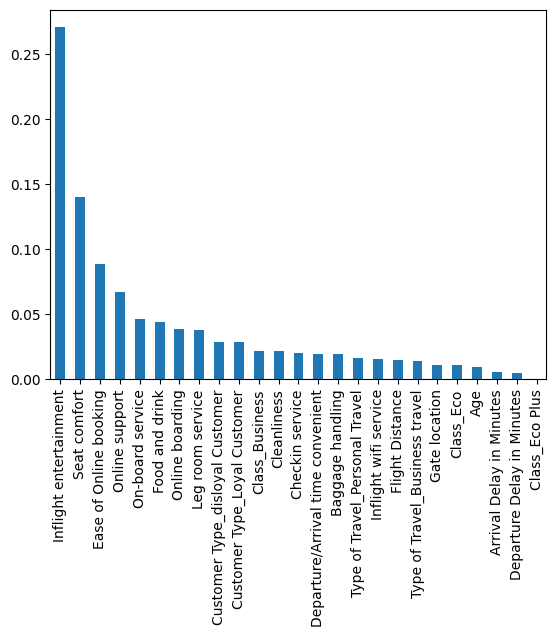

In [38]:

importances = rf_opt.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

**Question:** How does the random forest model compare to the decision tree model you built in the previous lab?

The random forest model is just slightly better than the tuned decision tree based on the calculated evaluation metrics. Also, the random forest is better in terms of the run or computational time, as it took us around 15 mins to execute the modeling in decision tree and only 5 mins for the tuned random forest.


## **Considerations**


**What are the key takeaways from this lab? Consider important steps when building a model, most effective approaches and tools, and overall results.**

- Data preprocessing is necessary prior building a Random Forest Model. It is required to convert categorical data into numeric one through encoding.
- The random forest model is better than decision tree


**What summary would you provide to stakeholders?**

- Two machine learning technique, namely `Decision Tree` and `Random Forest` were trained to predict customer satisfaction.
- Both models performed very well based on the evaluation metrics we used such as accuracy, precision, recall and f1 score.
- The random forest model has slightly outperformed the decision tree model with f1 score of 94.7% and accuracy of 94.2%
- Aside from the scores, the computational time for training a random forest model is lesser with only 5 mins versus that of decision tree which took 15 mins.
- Based on the feature importance plot, the factors that are most important to customer satisfaction are `inflight entertainment`, `seat comfort` and `Ease of Online Booking`.

### References

[What is the Difference Between Test and Validation Datasets?,  Jason Brownlee](https://machinelearningmastery.com/difference-test-validation-datasets/)

[Decision Trees and Random Forests Neil Liberman](https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged